### Método de Newton Raphson

Utilice el método de Newton-Raphson para localizar la raíz de $f(x) = e^{-x}-x$ con un error relativo porcentual menor a 0.01 % y suponiendo $x_0 = 0$

#### Solución

Recordando la fórmula para el método de Newton-Raphson

$$x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}$$

vemos que es necesario obtener la derivada $f'(x)$

$$f'(x) = -e^{-x}-1$$

Sustituyendo en la fórmula de Newton-Raphson

$$x_{i+1} = x_i - \frac{e^{-x_i}-x_i}{-e^{-x_i}-1}$$

Desarrollando en script:

In [11]:
import numpy as np
import math

def equation_f_x(x):
    return math.pow(np.e, -x) - x

def equation_derivate_f_x(x):
    return - math.pow(np.e, -x) - 1

error_a = 0.01
x_0 = 0

iterations = 0
error_a_iterations = math.nan
x_i = x_0
divergency = False
while ((error_a_iterations > error_a) or (math.isnan(error_a_iterations))):
    x_i_plus_one = x_i - (equation_f_x(x_i))/(equation_derivate_f_x(x_i))
    f_x_i_plus_one = equation_f_x(x_i_plus_one)
    if not(f_x_i_plus_one == 0):
        error_a_iterations = np.abs((x_i_plus_one - x_i)/x_i_plus_one)*100
        print("Iteration =", iterations, \
              "  x_{} =".format(iterations), "%.5f" % round(x_i, 5), \
              "  x_{} =".format(iterations + 1), "%.5f" % round(x_i_plus_one, 5), \
              "  relative_error =", round(error_a_iterations, 5), "%")
        iterations += 1
        x_i = x_i_plus_one
        if (iterations > 50):
            print("\nMethod does not converge or it does it very slow")
            divergency = True
            break
    else:
        print("Exact root was found")
        break

if (divergency == False):
    print("\nx_root_approx =", x_i_plus_one, "whit relative_error = (+/-)", error_a, "%")

Iteration = 0   x_0 = 0.00000   x_1 = 0.50000   relative_error = 100.0 %
Iteration = 1   x_1 = 0.50000   x_2 = 0.56631   relative_error = 11.70929 %
Iteration = 2   x_2 = 0.56631   x_3 = 0.56714   relative_error = 0.14673 %
Iteration = 3   x_3 = 0.56714   x_4 = 0.56714   relative_error = 2e-05 %

x_root_approx = 0.5671432904097811 whit relative_error = (+/-) 0.01 %


### Utilizando la librería sympy de python

In [8]:
import numpy as np
import math
import sympy

x = sympy.Symbol('x')

def equation(x):
    return sympy.exp(-x) - x

def equation_eval(a):
    f_x_eval = sympy.lambdify(x, equation(x))
    return f_x_eval(a)

def dev_equation(x):
    return equation(x).diff(x)

def dev_equation_eval(a):
    f_x_dev_eval = sympy.lambdify(x, dev_equation(x))
    return f_x_dev_eval(a)

print("function:   ", equation(x), \
      "\n\nfirst derivative function:   ", dev_equation(x), "\n\n")

error_a = 0.01
x_0 = 0

iterations = 0
error_a_iterations = math.nan
x_i = x_0
divergency = False
while ((error_a_iterations > error_a) or (math.isnan(error_a_iterations))):
    x_i_plus_one = x_i - (equation_eval(x_i))/(dev_equation_eval(x_i))
    f_x_i_plus_one = equation_eval(x_i_plus_one)
    if not(f_x_i_plus_one == 0):
        error_a_iterations = np.abs((x_i_plus_one - x_i)/x_i_plus_one)*100
        print("Iteration =", iterations, \
              "  x_{} =".format(iterations), "%.5f" % round(x_i, 5), \
              "  x_{} =".format(iterations + 1), "%.5f" % round(x_i_plus_one, 5), \
              "  relative_error =", round(error_a_iterations, 5), "%")
        iterations += 1
        x_i = x_i_plus_one
        if (iterations > 50):
            print("\nMethod does not converge or it does it very slow")
            divergency = True
            break
    else:
        print("Exact root was found")
        break

if (divergency == False):
    print("\nx_root_approx =", x_i_plus_one, "whit relative_error = (+/-)", error_a, "%")

function:    -x + exp(-x) 

first derivative function:    -1 - exp(-x) 


Iteration = 0   x_0 = 0.00000   x_1 = 0.50000   relative_error = 100.0 %
Iteration = 1   x_1 = 0.50000   x_2 = 0.56631   relative_error = 11.70929 %
Iteration = 2   x_2 = 0.56631   x_3 = 0.56714   relative_error = 0.14673 %
Iteration = 3   x_3 = 0.56714   x_4 = 0.56714   relative_error = 2e-05 %

x_root_approx = 0.5671432904097811 whit relative_error = (+/-) 0.01 %


#### Únicamente queda pendiente graficar la función e indicar la raíz encontrada

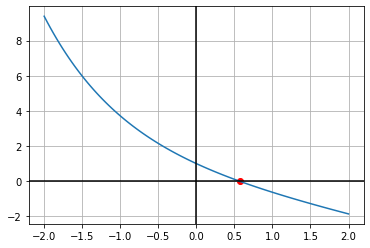

In [10]:
import matplotlib.pyplot as plt

_x = np.linspace(-2, 2, num = 100)

f_x = []
for i in range(len(_x)):
    f_x.append(equation_eval(_x[i]))
    
plt.plot(_x, f_x)
plt.scatter(x_i_plus_one, 0, color = 'r')
plt.grid()
plt.axvline(color = 'k')
plt.axhline(color = 'k')
plt.show()